<a href="https://colab.research.google.com/github/cabbi120101/TIL/blob/master/%EA%B3%B5%EB%AA%A8%EC%A0%84%EA%B3%B5%EB%B6%80/%EC%8B%9C%EA%B0%81%ED%99%94%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/%EC%A0%84%EC%B2%B4%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%AA%A8%EC%9D%8C%EA%B7%B8%EB%9E%98%ED%94%84%EA%B7%B8%EB%A6%AC%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [214]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [215]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
import re
import datetime 

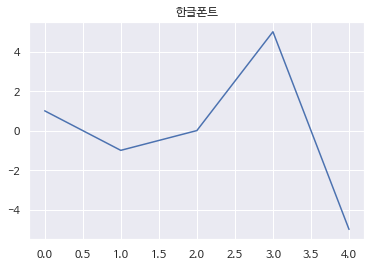

In [216]:
# seaborn 의 set 기능을 통해 폰트, 마이너스 폰트 설정, 스타일 설정을 합니다.
# "Malgun Gothic"
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

# 한글폰트 설정 확인을 합니다.

pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")

## 필요한 데이터 불러오기

In [217]:
#전체 코로나
data_file = '/content/drive/MyDrive/Colab Notebooks/코로나관련/코로나총데이터.csv'
co_df_all = pd.read_csv(data_file)
co_df_all.rename(columns={'지역':'구'}, inplace=True)
co_df_all.head()

,구,확진일,확진자수,연도,월,연도_월
0,강남구,2020-02-26,2,2020,2,2020-02
1,강남구,2020-02-27,1,2020,2,2020-02
2,강남구,2020-02-28,3,2020,2,2020-02
3,강남구,2020-02-29,1,2020,2,2020-02
4,강남구,2020-03-01,1,2020,3,2020-03


In [218]:
#전체 지하철
data_file = '/content/drive/MyDrive/Colab Notebooks/코로나관련/대중교통관련/지하철 코드/지하철총데이터.csv'
sub_df_all = pd.read_csv(data_file)
sub_df_all.rename(columns={'승차총승객수':'지하철이용수'}, inplace=True)
sub_df_all.head()

,사용일자,지하철이용수,구,연도,월,연도_월
0,2019-07-01,2735,중구,2019,7,2019-07
1,2019-07-01,6480,중구,2019,7,2019-07
2,2019-07-01,6480,중구,2019,7,2019-07
3,2019-07-01,3434,중구,2019,7,2019-07
4,2019-07-01,3434,중구,2019,7,2019-07


In [219]:
#전체 버스
data_file = '/content/drive/MyDrive/Colab Notebooks/코로나관련/대중교통관련/버스/버스총데이터.csv'
bus_df_all = pd.read_csv(data_file)
bus_df_all.rename(columns={'사용년월':'연도_월'}, inplace=True)
bus_df_all.rename(columns={'총승차승객수':'버스이용수'}, inplace=True)
bus_df_all.rename(columns={'소속구':'구'}, inplace=True)
bus_df_all.head()

,연도_월,구,버스이용수,연도,월
0,2019-07,성동구,3693,2019,7
1,2019-07,성동구,11993,2019,7
2,2019-07,성동구,13617,2019,7
3,2019-07,성동구,1811,2019,7
4,2019-07,성동구,6921,2019,7


## 그래프에 맞는 형태로 바꾸기

In [220]:
# 기간별 서울시 전체 확진자 합 구하기
co_df_sum=co_df_all[['연도_월','확진자수']].groupby('연도_월').sum()
co_df_sum.head()

,확진자수
연도_월,
2020-01,7
2020-02,70
2020-03,369
2020-04,143
2020-05,217


## 각 구 구하기

In [221]:
# 각 기관별 구 들의 수 구하기
#합말고 중앙값 사용
co_df_gu=co_df_all.groupby(['연도_월','구'])['확진자수'].median()
co_df_gu = co_df_gu.reset_index()
co_df_gu

,연도_월,구,확진자수
0,2020-01,강서구,1.0
1,2020-01,마포구,1.0
2,2020-01,성북구,1.0
3,2020-01,종로구,1.5
4,2020-01,중랑구,1.0
...,...,...,...
442,2021-07,용산구,16.0
443,2021-07,은평구,11.0
444,2021-07,종로구,6.0
445,2021-07,중구,4.0


In [222]:
sub_df_gu=sub_df_all.groupby(['연도_월','구'])['지하철이용수'].median()
sub_df_gu = sub_df_gu.reset_index()
sub_df_gu

,연도_월,구,지하철이용수
0,2019-07,강남구,13938.0
1,2019-07,강동구,12133.0
2,2019-07,강북구,31281.0
3,2019-07,강서구,10200.5
4,2019-07,관악구,34424.0
...,...,...,...
595,2021-06,용산구,6140.5
596,2021-06,은평구,10013.5
597,2021-06,종로구,11747.5
598,2021-06,중구,8728.0


In [223]:
sub_df_gu=sub_df_all.groupby(['연도_월','구'])['지하철이용수'].median()
sub_df_gu = sub_df_gu.reset_index()
sub_df_gu

,연도_월,구,지하철이용수
0,2019-07,강남구,13938.0
1,2019-07,강동구,12133.0
2,2019-07,강북구,31281.0
3,2019-07,강서구,10200.5
4,2019-07,관악구,34424.0
...,...,...,...
595,2021-06,용산구,6140.5
596,2021-06,은평구,10013.5
597,2021-06,종로구,11747.5
598,2021-06,중구,8728.0


In [224]:
bus_df_gu=bus_df_all.groupby(['연도_월','구'])['버스이용수'].median()
bus_df_gu = bus_df_gu.reset_index()
bus_df_gu

,연도_월,구,버스이용수
0,2019-07,강남구,3449.0
1,2019-07,강동구,2428.0
2,2019-07,강북구,2924.0
3,2019-07,강서구,2096.0
4,2019-07,관악구,3162.0
...,...,...,...
595,2021-06,용산구,2796.0
596,2021-06,은평구,1908.0
597,2021-06,종로구,2650.0
598,2021-06,중구,2444.0


In [225]:
sub_df_sum=sub_df_all[['연도_월','지하철이용수']].groupby('연도_월').sum()
sub_df_sum.head()

,지하철이용수
연도_월,
2019-07,201045706
2019-08,192685581
2019-09,184891114
2019-10,208901370
2019-11,202255789


In [226]:
bus_df_sum=bus_df_all[['연도_월','버스이용수']].groupby('연도_월').sum()
bus_df_sum.head()

,버스이용수
연도_월,
2019-07,154459432
2019-08,149717611
2019-09,142845461
2019-10,155690023
2019-11,150924516


## Merge 참고!! 2가지 컬럼으로 할 경우

In [227]:
# merge_left = pd.merge(df1,df2, how='left', left_on=['df1_연도월', 'df1_구'], right_on=['df2_연도월', 'df2_구'])
# merge_left

In [228]:
co_sub_gu_sum = pd.merge(sub_df_gu, co_df_gu, how='left', left_on=['연도_월', '구'], right_on=['연도_월', '구'])
co_sub_gu_sum

,연도_월,구,지하철이용수,확진자수
0,2019-07,강남구,13938.0,NaN
1,2019-07,강동구,12133.0,NaN
2,2019-07,강북구,31281.0,NaN
3,2019-07,강서구,10200.5,NaN
4,2019-07,관악구,34424.0,NaN
...,...,...,...,...
595,2021-06,용산구,6140.5,8.5
596,2021-06,은평구,10013.5,7.0
597,2021-06,종로구,11747.5,2.0
598,2021-06,중구,8728.0,2.0


In [229]:
all_gu_sum = pd.merge(co_sub_gu_sum, bus_df_gu, how='left', left_on=['연도_월', '구'], right_on=['연도_월', '구'])
all_gu_sum.head()

,연도_월,구,지하철이용수,확진자수,버스이용수
0,2019-07,강남구,13938.0,NaN,3449.0
1,2019-07,강동구,12133.0,NaN,2428.0
2,2019-07,강북구,31281.0,NaN,2924.0
3,2019-07,강서구,10200.5,NaN,2096.0
4,2019-07,관악구,34424.0,NaN,3162.0


In [230]:
all_all_sum= all_gu_sum.sort_values('연도_월')

all_all_sum.head()

,연도_월,구,지하철이용수,확진자수,버스이용수
0,2019-07,강남구,13938.0,NaN,3449.0
24,2019-07,중랑구,11328.0,NaN,1788.5
23,2019-07,중구,13162.0,NaN,3432.0
22,2019-07,종로구,17117.0,NaN,3740.0
21,2019-07,은평구,11773.0,NaN,2229.0


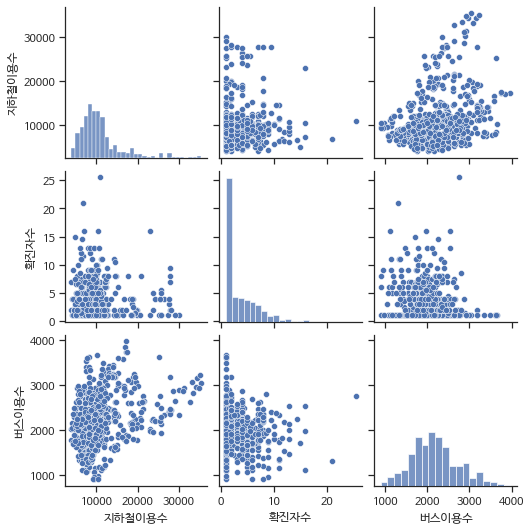

In [231]:
sns.set(
    style='ticks', 
    color_codes=True,
    font="NanumBarunGothic",
    )
co_sub_bus_all_fig = sns.pairplot(all_all_sum)

## 전체 데이터 기간별로 분류

In [232]:
all_all_sum['연도'] = all_all_sum['연도_월'].str.split('-', expand=True)[0]
all_all_sum['월'] = all_all_sum['연도_월'].str.split('-', expand=True)[1]
all_all_sum = all_all_sum.sort_values(['연도_월'])
all_all_sum


,연도_월,구,지하철이용수,확진자수,버스이용수,연도,월
0,2019-07,강남구,13938.0,NaN,3449.0,2019,07
6,2019-07,구로구,10970.5,NaN,2938.0,2019,07
10,2019-07,동대문구,12239.0,NaN,3242.0,2019,07
9,2019-07,도봉구,10553.5,NaN,2213.0,2019,07
8,2019-07,노원구,14210.0,NaN,1644.0,2019,07
...,...,...,...,...,...,...,...
590,2021-06,성동구,8266.0,6.5,1909.0,2021,06
589,2021-06,서초구,14540.5,10.5,2386.0,2021,06
586,2021-06,동작구,12857.5,8.0,2278.0,2021,06
581,2021-06,구로구,10982.5,5.0,2224.0,2021,06


In [233]:
all_all_sum_2019 = all_all_sum.loc[all_all_sum['연도_월']<='2019-12']
all_all_sum_2019

,연도_월,구,지하철이용수,확진자수,버스이용수,연도,월
0,2019-07,강남구,13938.0,NaN,3449.0,2019,07
6,2019-07,구로구,10970.5,NaN,2938.0,2019,07
10,2019-07,동대문구,12239.0,NaN,3242.0,2019,07
9,2019-07,도봉구,10553.5,NaN,2213.0,2019,07
8,2019-07,노원구,14210.0,NaN,1644.0,2019,07
...,...,...,...,...,...,...,...
146,2019-12,은평구,11993.0,NaN,2121.0,2019,12
147,2019-12,종로구,17551.0,NaN,3744.0,2019,12
148,2019-12,중구,13746.0,NaN,3210.0,2019,12
149,2019-12,중랑구,11366.0,NaN,1689.5,2019,12


In [259]:
# five_gu_list = [
#            (all_all_sum_2019['구']=='송파구','강동구','강남구','서초구'),
#            (all_all_sum_2019['구']=='동장구','관악구','금천구','영등포구','양천구','구로구','강서구'),
#            (all_all_sum_2019['구']=='마포구','서대문구','은평구','종로구','중구','용산구'),
#            (all_all_sum_2019['구']=='성북구','강북구','도봉구','노원구'),
#            (all_all_sum_2019['구']=='동대문구','중랑구','성동구','광진구')
# ]
# five_gu = ['강남구','강서구','중구','강북구','중랑구']
# all_all_sum_2019['오구'] = np.select(five_gu_list,five_gu,default='NotFound')
# all_all_sum_2019.head()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


ValueError: ignored

## 5구로 나누는 함수 제작

In [261]:
def set_five(row,value):
    return value[row]

five_gu = {'강남구':'강남구','강동구':'강남구','송파구':'강남구','서초구':'강남구',
           '동작구':'강서구','관악구':'강서구','금천구':'강서구','영등포구':'강서구','양천구':'강서구','구로구':'강서구','강서구':'강서구',
           '중랑구':'중랑구','광진구':'중랑구','동대문구':'중랑구','성동구':'중랑구',
           '은평구':'중구','종로구':'중구','서대문구':'중구','마포구':'중구','용산구':'중구','중구':'중구',
           '도봉구':'강북구','강북구':'강북구','성북구':'강북구','노원구':'강북구'
           }

all_all_sum_2019['오구']=all_all_sum_2019['구'].apply(set_five, args=(five_gu, ))
all_all_sum_2019.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,연도_월,구,지하철이용수,확진자수,버스이용수,연도,월,오구
0,2019-07,강남구,13938.0,NaN,3449.0,2019,07,강남구
6,2019-07,구로구,10970.5,NaN,2938.0,2019,07,강서구
10,2019-07,동대문구,12239.0,NaN,3242.0,2019,07,중랑구
9,2019-07,도봉구,10553.5,NaN,2213.0,2019,07,강북구
8,2019-07,노원구,14210.0,NaN,1644.0,2019,07,강북구


In [234]:
all_all_sum_2020 = all_all_sum.loc[all_all_sum['연도']=='2020']
all_all_sum_2020

,연도_월,구,지하철이용수,확진자수,버스이용수,연도,월
155,2020-01,광진구,14597.0,NaN,2616.0,2020,01
161,2020-01,동작구,13381.0,NaN,2775.5,2020,01
152,2020-01,강북구,24636.0,NaN,2584.0,2020,01
150,2020-01,강남구,12122.0,NaN,2824.0,2020,01
154,2020-01,관악구,32696.5,NaN,2626.0,2020,01
...,...,...,...,...,...,...,...
445,2020-12,용산구,3958.0,7.0,2010.0,2020,12
446,2020-12,은평구,7954.0,13.0,1471.5,2020,12
447,2020-12,종로구,8282.0,7.0,1795.0,2020,12
448,2020-12,중구,6184.0,5.5,1811.0,2020,12


In [262]:
all_all_sum_2020['오구']=all_all_sum_2020['구'].apply(set_five, args=(five_gu, ))
all_all_sum_2020.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,연도_월,구,지하철이용수,확진자수,버스이용수,연도,월,오구
155,2020-01,광진구,14597.0,NaN,2616.0,2020,01,중랑구
161,2020-01,동작구,13381.0,NaN,2775.5,2020,01,강서구
152,2020-01,강북구,24636.0,NaN,2584.0,2020,01,강북구
150,2020-01,강남구,12122.0,NaN,2824.0,2020,01,강남구
154,2020-01,관악구,32696.5,NaN,2626.0,2020,01,강서구


In [263]:
all_all_sum_2020['월'] = all_all_sum_2020['월'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [264]:
all_all_sum_2020_ss = all_all_sum_2020.loc[all_all_sum_2020['월'] <= '06']
all_all_sum_2020_ss

,연도_월,구,지하철이용수,확진자수,버스이용수,연도,월,오구
155,2020-01,광진구,14597.0,NaN,2616.0,2020,01,중랑구
161,2020-01,동작구,13381.0,NaN,2775.5,2020,01,강서구
152,2020-01,강북구,24636.0,NaN,2584.0,2020,01,강북구
150,2020-01,강남구,12122.0,NaN,2824.0,2020,01,강남구
154,2020-01,관악구,32696.5,NaN,2626.0,2020,01,강서구
...,...,...,...,...,...,...,...,...
295,2020-06,용산구,5317.0,1.0,2923.5,2020,06,중구
296,2020-06,은평구,9944.0,1.0,1686.0,2020,06,중구
297,2020-06,종로구,11380.0,1.0,3348.5,2020,06,중구
298,2020-06,중구,7817.0,1.0,3612.0,2020,06,중구


In [265]:
all_all_sum_2020_fw = all_all_sum_2020.loc[all_all_sum_2020['월'] >= '07']
all_all_sum_2020_fw

,연도_월,구,지하철이용수,확진자수,버스이용수,연도,월,오구
300,2020-07,강남구,11065.5,1.0,2912.0,2020,07,강남구
301,2020-07,강동구,10345.5,1.0,2171.0,2020,07,강남구
302,2020-07,강북구,25755.0,1.0,2486.0,2020,07,강북구
303,2020-07,강서구,8779.0,1.0,1742.5,2020,07,강서구
304,2020-07,관악구,29052.0,1.0,2640.5,2020,07,강서구
...,...,...,...,...,...,...,...,...
445,2020-12,용산구,3958.0,7.0,2010.0,2020,12,중구
446,2020-12,은평구,7954.0,13.0,1471.5,2020,12,중구
447,2020-12,종로구,8282.0,7.0,1795.0,2020,12,중구
448,2020-12,중구,6184.0,5.5,1811.0,2020,12,중구


In [266]:
all_all_sum_2021['오구']=all_all_sum_2021['구'].apply(set_five, args=(five_gu, ))
all_all_sum_2021.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,연도_월,구,지하철이용수,확진자수,버스이용수,연도,월,오구
450,2021-01,강남구,8881.5,7.5,2026.0,2021,01,강남구
451,2021-01,강동구,8326.5,5.0,1543.0,2021,01,강남구
452,2021-01,강북구,16819.0,4.0,1795.0,2021,01,강북구
453,2021-01,강서구,6453.5,5.0,1269.5,2021,01,강서구
454,2021-01,관악구,23733.5,5.0,1948.0,2021,01,강서구


In [268]:
all_all_sum_2021 = all_all_sum.loc[all_all_sum['연도']=='2021']
all_all_sum_2021

,연도_월,구,지하철이용수,확진자수,버스이용수,연도,월
450,2021-01,강남구,8881.5,7.5,2026.0,2021,01
451,2021-01,강동구,8326.5,5.0,1543.0,2021,01
452,2021-01,강북구,16819.0,4.0,1795.0,2021,01
453,2021-01,강서구,6453.5,5.0,1269.5,2021,01
454,2021-01,관악구,23733.5,5.0,1948.0,2021,01
...,...,...,...,...,...,...,...
590,2021-06,성동구,8266.0,6.5,1909.0,2021,06
589,2021-06,서초구,14540.5,10.5,2386.0,2021,06
586,2021-06,동작구,12857.5,8.0,2278.0,2021,06
581,2021-06,구로구,10982.5,5.0,2224.0,2021,06


In [269]:
all_all_sum_2021['오구']=all_all_sum_2021['구'].apply(set_five, args=(five_gu, ))
all_all_sum_2021.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,연도_월,구,지하철이용수,확진자수,버스이용수,연도,월,오구
450,2021-01,강남구,8881.5,7.5,2026.0,2021,01,강남구
451,2021-01,강동구,8326.5,5.0,1543.0,2021,01,강남구
452,2021-01,강북구,16819.0,4.0,1795.0,2021,01,강북구
453,2021-01,강서구,6453.5,5.0,1269.5,2021,01,강서구
454,2021-01,관악구,23733.5,5.0,1948.0,2021,01,강서구


## 그래프 그린것

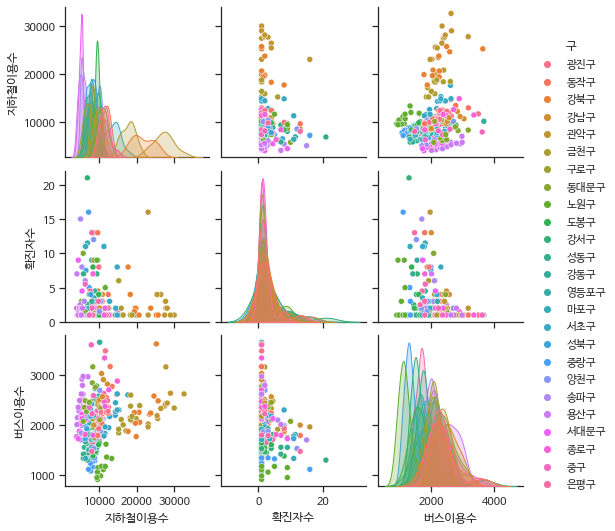

In [270]:
sns.set(
    style='ticks', 
    color_codes=True,
    font="NanumBarunGothic",
    )
all_all_sum_2020_fig = sns.pairplot(
    all_all_sum_2020,
    hue='구'
    )

plt.savefig('/content/data/All_2020.png',dpi=100)

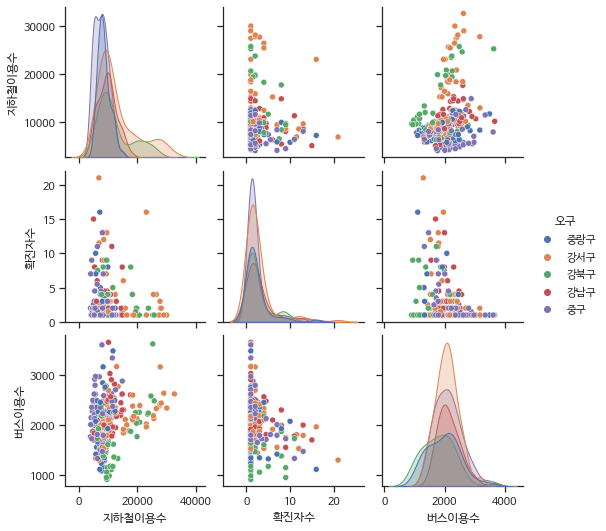

In [271]:
sns.set(
    style='ticks', 
    color_codes=True,
    font="NanumBarunGothic",
    )
all_all_sum_2020_fig = sns.pairplot(
    all_all_sum_2020,
    hue='오구'
    )

plt.savefig('/content/data/All_2020_구분.png',dpi=100)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

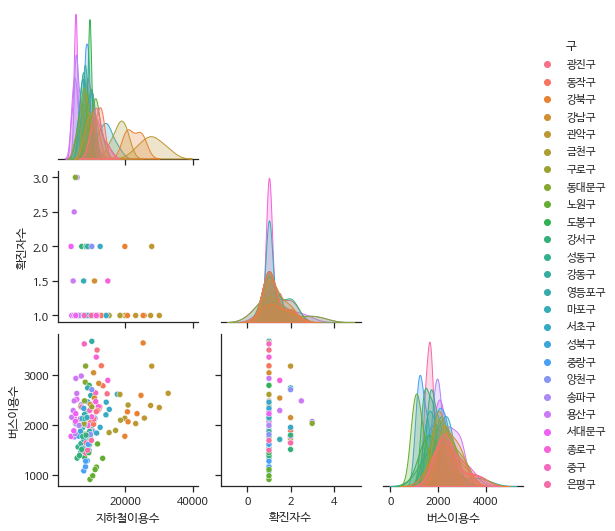

In [272]:
sns.set(
    style='ticks', 
    color_codes=True,
    font="NanumBarunGothic",
    )
all_all_sum_2020_ss_fig = sns.pairplot(
    all_all_sum_2020_ss,
    palette='husl',
    corner = True,
    hue='구'
    )
plt.savefig('/content/data/All_2020_상반기.png',dpi=100)

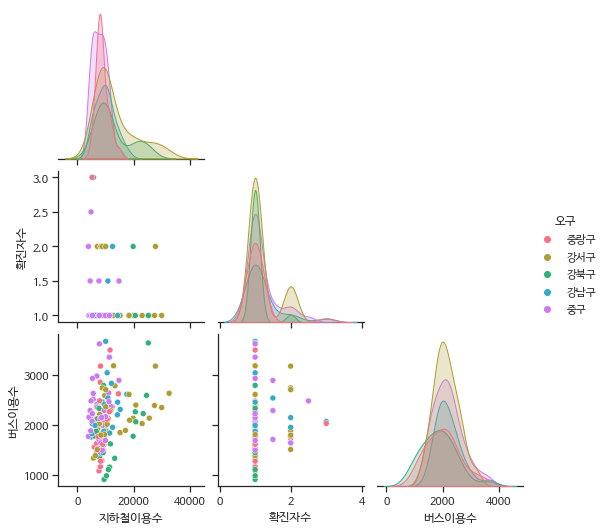

In [274]:
sns.set(
    style='ticks', 
    color_codes=True,
    font="NanumBarunGothic",
    )
all_all_sum_2020_ss_fig = sns.pairplot(
    all_all_sum_2020_ss,
    palette='husl',
    corner = True,
    hue='오구'
    )
plt.savefig('/content/data/All_2020_상반기_구분.png',dpi=100)

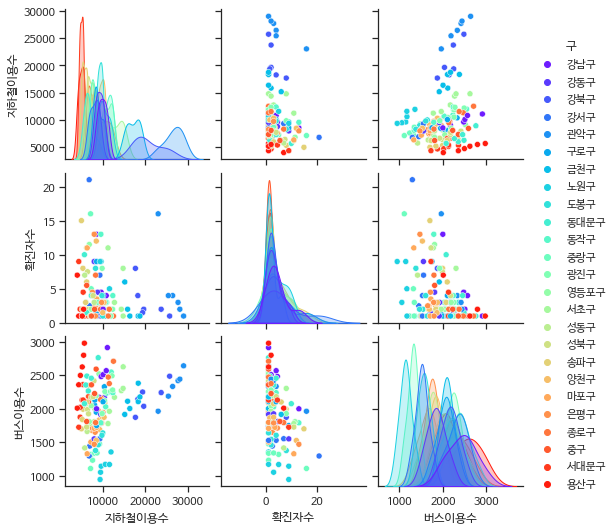

In [277]:
sns.set(
    style='ticks', 
    color_codes=True,
    font="NanumBarunGothic",
    )
all_all_sum_2020_fw_fig = sns.pairplot(
    all_all_sum_2020_fw,
    hue='구',
    palette='rainbow'
    )
plt.savefig('/content/data/All_2020_하반기.png',dpi=100)

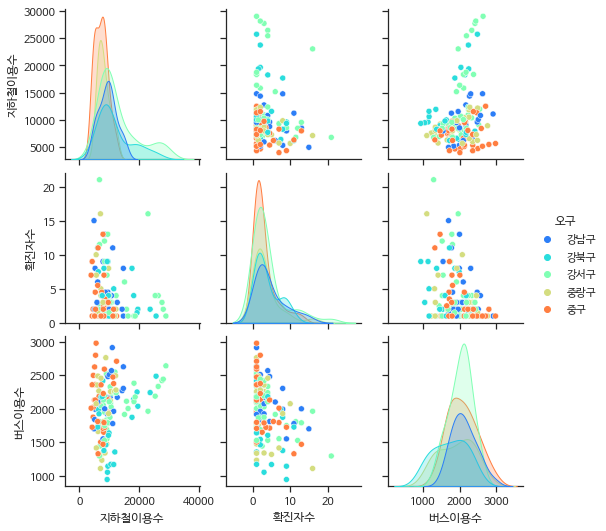

In [276]:
sns.set(
    style='ticks', 
    color_codes=True,
    font="NanumBarunGothic",
    )
all_all_sum_2020_fw_fig = sns.pairplot(
    all_all_sum_2020_fw,
    hue='오구',
    palette='rainbow'
    )
plt.savefig('/content/data/All_2020_하반기_구분.png',dpi=100)

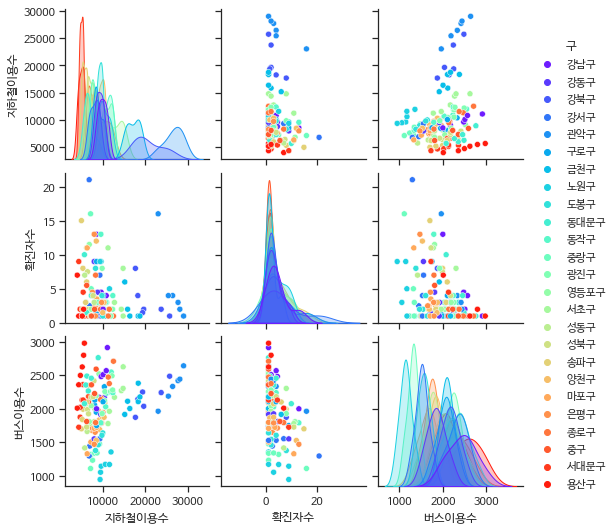

In [278]:
sns.set(
    style='ticks', 
    color_codes=True,
    font="NanumBarunGothic",
    )
all_all_sum_2020_fw_fig = sns.pairplot(
    all_all_sum_2020_fw,
    hue='구',
    palette='rainbow'
    )
plt.savefig('/content/data/All_2021.png',dpi=100)

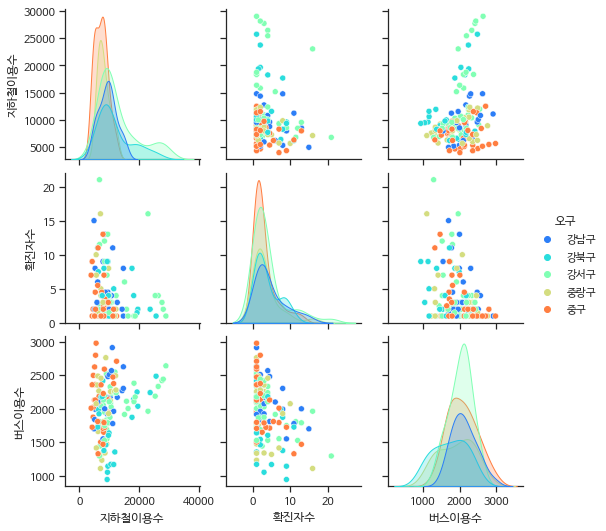

In [279]:
sns.set(
    style='ticks', 
    color_codes=True,
    font="NanumBarunGothic",
    )
all_all_sum_2020_fw_fig = sns.pairplot(
    all_all_sum_2020_fw,
    hue='오구',
    palette='rainbow'
    )
plt.savefig('/content/data/All_2021_구분.png',dpi=100)